In [1]:
import pandas as pd
import sklearn
import numpy as np
import pickle
import re
import json
from pprint import pprint as pp
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
import logging
logging.basicConfig(level=logging.INFO, filename="predictSubjects_interesting_3-v2.log")

## Load paper-text:

In [3]:
%%time
dataset_path = "../resources/interesting_arxiv_papers_textclean.pkl"
df_text = pd.read_pickle(dataset_path)
df_text

Wall time: 630 ms


,paper_id,text
0,100036,paper present multimod biometr system fingerpr...
1,100075,random trial known ab test select polici contr...
2,100147,deep qnetwork returnbas reinforc learn promis ...
3,100161,studi problem learn polici demonstr combinator...
4,100208,present novel method compress deep convolut ne...
...,...,...
21797,99842,case combin classifi show product rule aris ma...
21798,99920,propos novel dialogu model framework use binar...
21799,99922,studi classif problem featur acquir cost goal ...
21800,99932,challeng imag process task describ illpos line...


In [4]:
# apply more text_cleaning
def initial_text_cleaning(text):
    #text = text.lower()                                             # transform to lowercase
    #text = re.sub(r'\n', '', text)                                  # remove \n
    #text = re.sub(r'(\(|\[|\{)[^(\)|\]|\})]*(\)|\]|\})', '', text)  # remove everything in parentheses
    #text = re.sub(r'http(s)?:\/\/\S+', '', text)                    # remove url
    #text = re.sub(r'[^a-z\s]', '', text)  #[^\w\s]                  # remove everything that is not a word (therefore also numbers and punctuation)
    text = re.sub(r'\b\w{1,2}\b', '', text)                         # remove all single and double letters
    text = re.sub(r'\b(h|i|j|k|x|y)+\b', '', text)                  # remove some common letters used in formules 
    text = re.sub(r'\s{2,}', ' ', text).strip()                     # reformat spaces
    return text

# text - cleaning:
df_text['text'] = df_text['text'].apply(initial_text_cleaning)

## Feature Extraction:

In [5]:
#%%time
#from sklearn.feature_extraction.text import TfidfVectorizer
#
#corpus = ddf['text'].compute()
#tfidf_vect = TfidfVectorizer(max_features=40000, min_df=3, norm='l2', ngram_range=(1, 2))
#features = tfidf_vect.fit_transform(corpus).toarray()
#print(len(tfidf_vect.vocabulary_), features.shape)

In [6]:
## save vectorizer:
#vectorizer_path = "../resources/tdidf_bigram_interesting_vectorizer.pkl"
#with open(vectorizer_path, 'wb') as picklefile:
#    pickle.dump(tfidf_vect, picklefile)

In [7]:
# open vectorizer:
tfidf_vect = None
vectorizer_path = "../resources/tdidf_bigram_interesting_vectorizer.pkl"
with open(vectorizer_path, 'rb') as picklefile:
    tfidf_vect = pickle.load(picklefile)

## Load Taxonomy and Dataset:

In [8]:
taxonomy = {}
with open('../resources/simplest-taxonomy-v2.json') as f:
    taxonomy = json.load(f)
pp(taxonomy, indent=4)

{   'taxonomy_pt1': {   'econ': {   'id-category': 'econ',
                                    'ids': [   'econ',
                                               'econ.EM',
                                               'econ.GN',
                                               'econ.TH'],
                                    'name-category': 'Economics'},
                        'eess': {   'id-category': 'eess',
                                    'ids': [   'eess',
                                               'eess.AS',
                                               'eess.IV',
                                               'eess.SP',
                                               'eess.SY'],
                                    'name-category': 'Electrical Engineering '
                                                     'and Systems Science'},
                        'math': {   'id-category': 'math',
                                    'ids': [   'math',
                           

In [9]:
dataset_path = "../resources/papers-subjects-dataset.pkl"
df = pd.read_pickle(dataset_path)
ids = list(df_text.paper_id)
df = df.loc[df.paper_id.isin(ids)]
df.reset_index(drop=True, inplace=True)
df = df.merge(df_text, how='left', on="paper_id")
df = df.drop(columns='primary-subject', axis=1)
df

,paper_id,astro-ph,astro-ph.CO,astro-ph.EP,astro-ph.GA,astro-ph.HE,astro-ph.IM,astro-ph.SR,cond-mat,cond-mat.dis-nn,...,q-fin.RM,q-fin.ST,q-fin.TR,quant-ph,stat.AP,stat.CO,stat.ME,stat.ML,stat.OT,text
0,41513,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,investig experienti learn paradigm acquir inte...
1,61821,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,work establish empir success framework adapt l...
2,61822,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,paper present oimplement tsne embed techniqu c...
3,61823,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonneg matrix factor ubiquit tool data analysi...
4,61824,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,paper describ serial parallel composit model m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21797,101218,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,stateoftheart perform deep learn algorithm led...
21798,101219,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,mixup propos dataaugment scheme linearli inter...
21799,101220,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,linear discrimin analysi wellknown method dime...
21800,101222,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,research investig techniqu data learn bayesian...


## PART 1:

#### Explore relations between papers and subjects:

In [10]:
def get_oneHotVector(x):
    # create dict 
    row = {'paper_id': x['paper_id']}
    for k in taxonomy['taxonomy_pt1'].keys():
        row[k] = 0
    # update dict
    all_subjects = list(x.index)[2:]
    for k,t in taxonomy['taxonomy_pt1'].items():
        for s in t['ids']:
            if s in all_subjects and x[s]==1:
                row[k] = 1 
                break
    # return Series
    return pd.Series(row)

columns = list(taxonomy['taxonomy_pt2'].keys())
columns.remove('cs')
simplified_df_pt1 = df.drop(columns=columns, axis=1)
simplified_df_pt1 = simplified_df_pt1.apply(lambda x: get_oneHotVector(x), axis=1)
simplified_df_pt1

,paper_id,phy,math,q-bio,q-fin,stat,eess,econ
0,41513,0,0,0,0,0,0,0
1,61821,0,0,0,0,0,0,0
2,61822,0,0,0,0,0,0,0
3,61823,0,1,0,0,0,0,0
4,61824,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
21797,101218,0,0,0,0,0,0,0
21798,101219,0,0,0,0,0,0,0
21799,101220,0,0,0,0,0,0,0
21800,101222,0,0,0,0,0,0,0


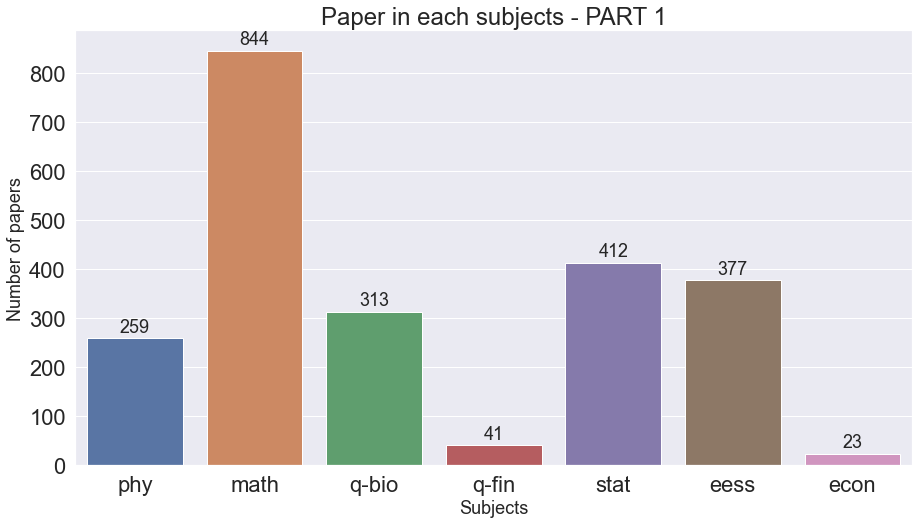

In [11]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(list(simplified_df_pt1.columns)[1:], simplified_df_pt1.iloc[:,1:].sum().values)

plt.title("Paper in each subjects - PART 1", fontsize=24)
plt.ylabel('Number of papers', fontsize=18)
plt.xlabel('Subjects', fontsize=18)

#adding the text labels
rects = ax.patches
labels = simplified_df_pt1.iloc[:,1:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

#### Split in train and test set:

In [12]:
df = simplified_df_pt1.merge(df_text, how='left', on="paper_id")
df

,paper_id,phy,math,q-bio,q-fin,stat,eess,econ,text
0,41513,0,0,0,0,0,0,0,investig experienti learn paradigm acquir inte...
1,61821,0,0,0,0,0,0,0,work establish empir success framework adapt l...
2,61822,0,0,0,0,0,0,0,paper present oimplement tsne embed techniqu c...
3,61823,0,1,0,0,0,0,0,nonneg matrix factor ubiquit tool data analysi...
4,61824,0,0,0,0,0,0,0,paper describ serial parallel composit model m...
...,...,...,...,...,...,...,...,...,...
21797,101218,0,0,0,0,0,0,0,stateoftheart perform deep learn algorithm led...
21798,101219,0,0,0,0,0,0,0,mixup propos dataaugment scheme linearli inter...
21799,101220,0,0,0,0,0,0,0,linear discrimin analysi wellknown method dime...
21800,101222,0,0,0,0,0,0,0,research investig techniqu data learn bayesian...


In [13]:
X_df = df.loc[:, ['paper_id','text']]
y_df = df.drop(columns=['paper_id','text'], axis=1)

from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit

msss = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.2, train_size=None, random_state=0)
train_index, test_index = next(msss.split(X_df, y_df))
print(len(train_index), len(test_index))

17441 4361


In [14]:
df_train = df.iloc[train_index]
df_test = df.iloc[test_index]

X_train = tfidf_vect.transform(df.iloc[train_index]['text'])
X_test = tfidf_vect.transform(df_test['text'])
print(X_train.shape, X_test.shape)

y_train = y_df.iloc[train_index]
y_test = y_df.iloc[test_index]
print(y_train.shape, y_test.shape)

(17441, 40000) (4361, 40000)
(17441, 7) (4361, 7)


#### Classification:

In [15]:
columns=['part', 'method',
         'accuracy_train', 'precision_macro_train', 'recall_macro_train', 'f1_macro_train',
         'accuracy_test', 'precision_macro_test', 'recall_macro_test', 'f1_macro_test']
df_stat = pd.DataFrame(columns=columns)
df_stat

,part,method,accuracy_train,precision_macro_train,recall_macro_train,f1_macro_train,accuracy_test,precision_macro_test,recall_macro_test,f1_macro_test


In [16]:
labels = []
subjects = []
for l,s in enumerate(list(y_train.columns)):
    labels.append(l)
    subjects.append(s)

In [17]:
%%time
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report#, confusion_matrix, multilabel_confusion_matrix

model_modes = ['mnb', 'cnb', 'cnb_norm', 'svc', 'lr', 'dummy_rnd', 'dummy_mf', 'dummy_stf']
models = {
    'lr': {'name': 'Logistic Regression',
           'estimator': LogisticRegression(solver='sag', class_weight='balanced')
    },
    'svc': {'name': 'Linear SVC         ',
            'estimator': LinearSVC(class_weight='balanced')
    },
    'mnb': {'name': 'Multinomial NB     ',
            'estimator': MultinomialNB(fit_prior=True, class_prior=None)
    },
    'cnb': {'name': 'Complement NB      ',
            'estimator': ComplementNB(fit_prior=True, class_prior=None, norm=False)
    },
    'cnb_norm': {'name': 'Complement NB norm ',
                 'estimator': ComplementNB(fit_prior=True, class_prior=None, norm=True)
    },
    'dummy_rnd': {'name': 'Dummy Uniform      ',
                  'estimator': DummyClassifier(strategy='uniform')
    },
    'dummy_mf': {'name': 'Dummy Most-Frequent',
                 'estimator': DummyClassifier(strategy='most_frequent')
    },
    'dummy_stf': {'name': 'Dummy Stratified   ',
                 'estimator': DummyClassifier(strategy='stratified')
    }
}

logging.info("\n\n>>> TAXONOMY WITH %s SUBJECTS - PART 1\n\n" % len(subjects))

for model_mode in model_modes:
    logging.info("OneVsRest - %s" % models[model_mode]['name'])
    classifier = OneVsRestClassifier(models[model_mode]['estimator'], n_jobs=-1)
    row = {'part': 'part_1', 'method': models[model_mode]['name'].strip()}
    # TRAIN
    logging.info("... training on %s samples" % X_train.shape[0])
    classifier.fit(X_train, y_train)
    logging.info("... predicting on train set")
    prediction_train = classifier.predict(X_train)
    logging.info("\n\t\t accuracy = %s" % accuracy_score(y_train, prediction_train))
    logging.info("\n\t\t f1_macro = %s" % f1_score(y_train, prediction_train, average="macro"))
    logging.info("\n%s" % classification_report(y_train, prediction_train, labels=labels, target_names=subjects))
    row['accuracy_train'] = accuracy_score(y_train, prediction_train)
    row['precision_macro_train'] = precision_score(y_train, prediction_train, average="macro")
    row['recall_macro_train'] = recall_score(y_train, prediction_train, average="macro")
    row['f1_macro_train'] = f1_score(y_train, prediction_train, average="macro")
    # TEST
    logging.info("... predicting on test set")
    prediction_test = classifier.predict(X_test)
    logging.info("\n\t\t accuracy = %s" % accuracy_score(y_test, prediction_test))
    logging.info("\n\t\t f1_macro = %s" % f1_score(y_test, prediction_test, average="macro"))
    logging.info("\n%s" % classification_report(y_test, prediction_test, labels=labels, target_names=subjects))
    row['accuracy_test'] = accuracy_score(y_test, prediction_test)
    row['precision_macro_test'] = precision_score(y_test, prediction_test, average="macro")
    row['recall_macro_test'] = recall_score(y_test, prediction_test, average="macro")
    row['f1_macro_test'] = f1_score(y_test, prediction_test, average="macro")
    logging.info("="*60)
    # append to df_stat
    df_stat = df_stat.append(row, ignore_index=True)

Wall time: 1min 43s


## PART 2:

In [18]:
dataset_path = "../resources/papers-subjects-dataset.pkl"
df = pd.read_pickle(dataset_path)
ids = list(df_text.paper_id)
df = df.loc[df.paper_id.isin(ids)]
df.reset_index(drop=True, inplace=True)
df = df.merge(df_text, how='left', on="paper_id")
df = df.drop(columns='primary-subject', axis=1)
df

,paper_id,astro-ph,astro-ph.CO,astro-ph.EP,astro-ph.GA,astro-ph.HE,astro-ph.IM,astro-ph.SR,cond-mat,cond-mat.dis-nn,...,q-fin.RM,q-fin.ST,q-fin.TR,quant-ph,stat.AP,stat.CO,stat.ME,stat.ML,stat.OT,text
0,41513,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,investig experienti learn paradigm acquir inte...
1,61821,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,work establish empir success framework adapt l...
2,61822,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,paper present oimplement tsne embed techniqu c...
3,61823,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonneg matrix factor ubiquit tool data analysi...
4,61824,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,paper describ serial parallel composit model m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21797,101218,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,stateoftheart perform deep learn algorithm led...
21798,101219,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,mixup propos dataaugment scheme linearli inter...
21799,101220,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,linear discrimin analysi wellknown method dime...
21800,101222,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,research investig techniqu data learn bayesian...


#### Explore relations between papers and subjects:

In [19]:
def get_oneHotVector(x):
    # create dict 
    row = {'cs': 0}
    # update dict
    all_subjects = list(x.index)[2:]
    for s in taxonomy['taxonomy_pt2']['cs']['ids']:
        if s in all_subjects and x[s]==1:
            row['cs'] = 1 
            break
    # return Series
    return pd.Series(row)

columns_pt2 = ['paper_id']
columns_pt2.extend(list(taxonomy['taxonomy_pt2'].keys()))
columns_pt2.remove('cs')
simplified_df_pt2 = df.loc[:, columns_pt2]
simplified_df_pt2['cs'] = df.apply(lambda x: get_oneHotVector(x), axis=1)
simplified_df_pt2

,paper_id,cs.AI,cs.CV,cs.LG,stat.ML,cs
0,41513,1,1,0,0,1
1,61821,1,0,1,1,0
2,61822,0,1,1,1,0
3,61823,0,0,1,0,0
4,61824,0,1,0,0,0
...,...,...,...,...,...,...
21797,101218,0,1,1,1,1
21798,101219,1,0,1,1,0
21799,101220,0,1,1,1,0
21800,101222,1,0,1,1,0


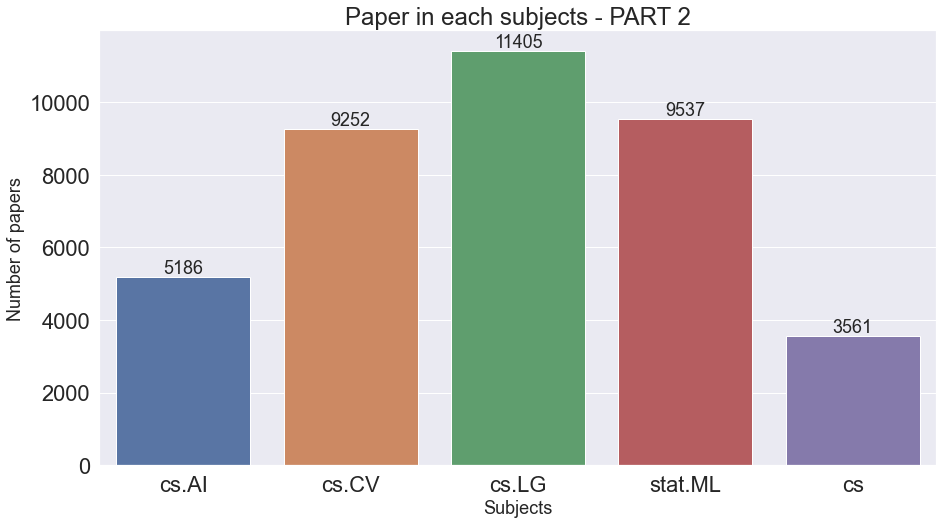

In [20]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(list(simplified_df_pt2.columns)[1:], simplified_df_pt2.iloc[:,1:].sum().values)

plt.title("Paper in each subjects - PART 2", fontsize=24)
plt.ylabel('Number of papers', fontsize=18)
plt.xlabel('Subjects', fontsize=18)

#adding the text labels
rects = ax.patches
labels = simplified_df_pt2.iloc[:,1:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

#### Split in train and test set:

In [21]:
df = simplified_df_pt2.merge(df_text, how='left', on="paper_id")
df

,paper_id,cs.AI,cs.CV,cs.LG,stat.ML,cs,text
0,41513,1,1,0,0,1,investig experienti learn paradigm acquir inte...
1,61821,1,0,1,1,0,work establish empir success framework adapt l...
2,61822,0,1,1,1,0,paper present oimplement tsne embed techniqu c...
3,61823,0,0,1,0,0,nonneg matrix factor ubiquit tool data analysi...
4,61824,0,1,0,0,0,paper describ serial parallel composit model m...
...,...,...,...,...,...,...,...
21797,101218,0,1,1,1,1,stateoftheart perform deep learn algorithm led...
21798,101219,1,0,1,1,0,mixup propos dataaugment scheme linearli inter...
21799,101220,0,1,1,1,0,linear discrimin analysi wellknown method dime...
21800,101222,1,0,1,1,0,research investig techniqu data learn bayesian...


In [22]:
X_df = df.loc[:, ['paper_id','text']]
y_df = df.drop(columns=['paper_id','text'], axis=1)

from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit

msss = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.2, train_size=None, random_state=0)
train_index, test_index = next(msss.split(X_df, y_df))
print(len(train_index), len(test_index))

17473 4329


In [23]:
df_train = df.iloc[train_index]
df_test = df.iloc[test_index]

X_train = tfidf_vect.transform(df.iloc[train_index]['text'])
X_test = tfidf_vect.transform(df_test['text'])
print(X_train.shape, X_test.shape)

y_train = y_df.iloc[train_index]
y_test = y_df.iloc[test_index]
print(y_train.shape, y_test.shape)

(17473, 40000) (4329, 40000)
(17473, 5) (4329, 5)


#### Classification:

In [24]:
labels = []
subjects = []
for l,s in enumerate(list(y_train.columns)):
    labels.append(l)
    subjects.append(s)

In [25]:
logging.info("\n\n>>> TAXONOMY WITH %s SUBJECTS - PART 2\n\n" % len(subjects))

for model_mode in model_modes:
    logging.info("OneVsRest - %s" % models[model_mode]['name'])
    classifier = OneVsRestClassifier(models[model_mode]['estimator'], n_jobs=-1)
    row = {'part': 'part_2', 'method': models[model_mode]['name'].strip()}
    # TRAIN
    logging.info("... training on %s samples" % X_train.shape[0])
    classifier.fit(X_train, y_train)
    logging.info("... predicting on train set")
    prediction_train = classifier.predict(X_train)
    logging.info("\n\t\t accuracy = %s" % accuracy_score(y_train, prediction_train))
    logging.info("\n\t\t f1_macro = %s" % f1_score(y_train, prediction_train, average="macro"))
    logging.info("\n%s" % classification_report(y_train, prediction_train, labels=labels, target_names=subjects))
    row['accuracy_train'] = accuracy_score(y_train, prediction_train)
    row['precision_macro_train'] = precision_score(y_train, prediction_train, average="macro")
    row['recall_macro_train'] = recall_score(y_train, prediction_train, average="macro")
    row['f1_macro_train'] = f1_score(y_train, prediction_train, average="macro")
    # TEST
    logging.info("... predicting on test set")
    prediction_test = classifier.predict(X_test)
    logging.info("\n\t\t accuracy = %s" % accuracy_score(y_test, prediction_test))
    logging.info("\n\t\t f1_macro = %s" % f1_score(y_test, prediction_test, average="macro"))
    logging.info("\n%s" % classification_report(y_test, prediction_test, labels=labels, target_names=subjects))
    row['accuracy_test'] = accuracy_score(y_test, prediction_test)
    row['precision_macro_test'] = precision_score(y_test, prediction_test, average="macro")
    row['recall_macro_test'] = recall_score(y_test, prediction_test, average="macro")
    row['f1_macro_test'] = f1_score(y_test, prediction_test, average="macro")
    logging.info("="*60)
    # append to df_stat
    df_stat = df_stat.append(row, ignore_index=True)

## RESULTS:

In [26]:
df_stat

,part,method,accuracy_train,precision_macro_train,recall_macro_train,f1_macro_train,accuracy_test,precision_macro_test,recall_macro_test,f1_macro_test
0,part_1,Multinomial NB,0.904822,0.118012,0.004021,0.007777,0.903463,0.122449,0.005072,0.009740
1,part_1,Complement NB,0.908033,0.096713,0.032381,0.048518,0.903692,0.081633,0.033812,0.047818
2,part_1,Complement NB norm,0.904019,0.071429,0.000212,0.000422,0.902087,0.000000,0.000000,0.000000
3,part_1,Linear SVC,0.985207,0.888685,1.000000,0.940811,0.888328,0.374464,0.347514,0.357833
4,part_1,Logistic Regression,0.455134,0.136666,0.886856,0.221891,0.442100,0.108142,0.743267,0.175154
5,part_1,Dummy Uniform,0.904019,0.000000,0.000000,0.000000,0.902545,0.000000,0.000000,0.000000
6,part_1,Dummy Most-Frequent,0.904019,0.000000,0.000000,0.000000,0.902545,0.000000,0.000000,0.000000
7,part_1,Dummy Stratified,0.814747,0.014176,0.014301,0.014234,0.814492,0.011393,0.011469,0.011429
8,part_2,Multinomial NB,0.557431,0.855872,0.662715,0.693043,0.545392,0.852219,0.646417,0.676357
9,part_2,Complement NB,0.560121,0.794362,0.744509,0.758634,0.548626,0.774088,0.715775,0.730858
